<a href="https://colab.research.google.com/github/likhitha2223/ML-projects/blob/main/MNIST_recognition_with_LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I. Introduction
LeNet (or LeNet-5) is a convolutional neural network structure. The first purpose of this network is to recognize handwritten digits in images. It was successfully applied for identifying handwritten zip code numbers provided by the US Postal Service.


## II. Architechture
LeNet consists of 2 parts:
- The first part includes two convolutional layers and two pooling layers which are placed alternatively.
- The second part consists of three fully connected layers.

The architecture of LeNet is described by the following figure:
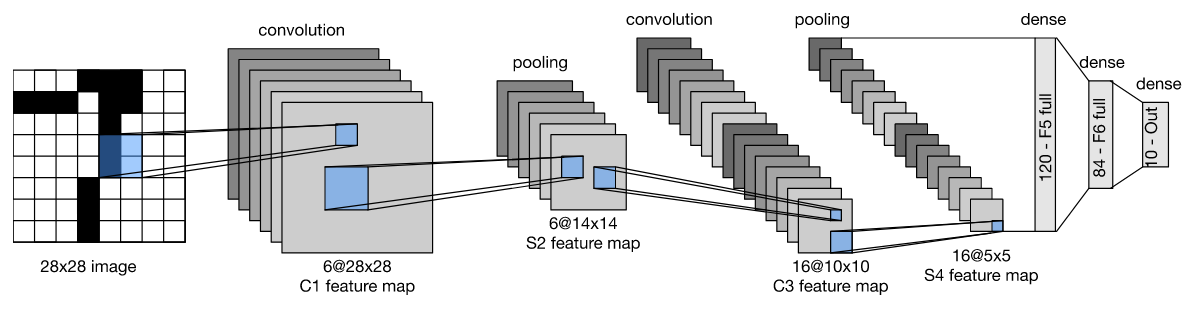

In the figure above, Cx, Sx, Fx are corresponding to the convolutional layer, sub-sampling layer (a.k.a pooling layer), and fully connected layer, respectively, where x denotes the layer index.
- The input is images of size 28 × 28
- C1 is the first convolutional layer with 6 convolution kernels of size 5× 5.
- S2 is the pooling layer that outputs 6 channels of 14 × 14  images. The pooling window size, in this case, is a square matrix of size 2 × 2.
- C3 is a convolutional layer with 16 convolution kernels of size 5 × 5. Hence, the output of this layer is 16 feature images of size 10 × 10.
- S4 is a pooling layer with a pooling window of size 2 × 2. Hence, the dimension of images through this layer is halved, it outputs 16 feature images of size 5 × 5.
- C5 is the convolutional layer with 120 convolution kernels of size 5 × 5. Since the inputs of this layer have the same size as the kernel, then the output size of this layer is 1 × 1. The number of channels in output equals the channel number of kernels, which is 120. Hence the output of this layer is 120 feature images of size 1 × 1.
- F6 is a fully connected layer with 84 neurons which are all connected to the output of C5.
- The output layer consists of 10 neurons corresponding to the number of classes (numbers from 0 to 9), and a softmax function. The Softmax gives the probability that a data point belongs to a particular class. The highest value is then predicted.


### III. Application for recognizing MNIST hanwritten digit images
In this section, we apply LeNet for recognizing MNIST handwritten digit images. This network is constructed in Keras platform:

In [43]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [44]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

### 1. Loading MNIST dataset

In [45]:
import tensorflow as tf

In [46]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [47]:
print('X_train shape', X_train.shape, 'y_train shape', y_train.shape)
print('X_test shape', X_test.shape, 'y_test shape', y_test.shape)

X_train shape (60000, 28, 28) y_train shape (60000,)
X_test shape (10000, 28, 28) y_test shape (10000,)


In [48]:
type(X_train)

numpy.ndarray

Visualizing randomly some images in the training set:

In [49]:
import matplotlib.pyplot as plt
import random

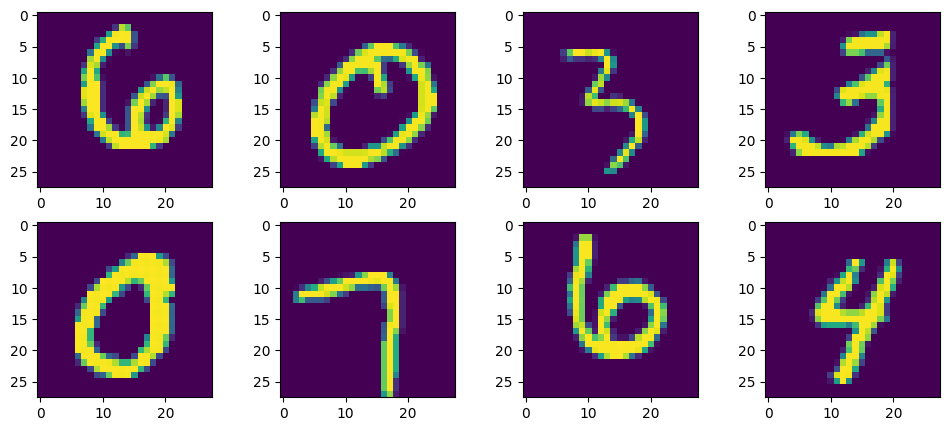

In [50]:
plt.figure(figsize = (12,5))
for i in range(8):
  index = random.randint(0, len(X_train))  # random.randint returns a random integer in range [a, b], including both end points.
  plt.subplot(240+1+i)
  # 240 specifies the number of rows and columns in the subplot grid. Here, it's indicating that there will be 2 rows and 4 columns of subplots, resulting in a total of 8 subplots.
  # 1 is added to the 240 to specify the index of the current subplot. It is the position of the subplot within the grid.
  # i is being iterated over in the loop. It ranges from 0 to 7, inclusive. It is added to 1 to create sequential subplot indices starting from 1.
  # So, 240+1+i computes the index of the subplot within the grid for each iteration of the loop.
  # For example, when i is 0, the subplot index will be 241, and when i is 1, the subplot index will be 242, and so on, until i is 7, resulting in a subplot index of 248.
  plt.imshow(X_train[index])

### 2. Preprocessing data
This task includes the following steps:

- Reshape images into required size of Keras
- Convert integer values into float values
- Normalize data
- One-hot encodeing labels

In [51]:
from keras.utils import to_categorical

In [52]:
def preprocess_data(X_train, y_train, X_test, y_test):

  # reshape images to the the required size by Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  # convert to grayscale
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  # X_train.shape[0] is the number of images in the training dataset.
  # X_train.shape[1] is the height of each image.
  # X_train.shape[2] is the width of each image.
  # 1 at the end indicates that the images are grayscale. If you have RGB images, you would typically use 3 channels (one for each of red, green, and blue).

  # # resize the images to (32,32) from (28,28) in case we are using the original LeNet-5, which only takes input size of (32,32,1)
  # X_train = tf.image.resize(X_train, (32, 32))
  # X_test = tf.image.resize(X_train, (32, 32))

  # convert from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  # normalize to range 0-1
  X_train = X_train/255.0
  X_test = X_test/255.0

  # One-hot encoding label
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return X_train, y_train, X_test, y_test

## 3. Buiding the LeNet model

In [53]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# metrics
from keras.metrics import categorical_crossentropy
# optimization method
from keras.optimizers import SGD

In [54]:
def LeNet():
  model = Sequential()  # Sequential groups a linear stack of layers into a tf.keras.Model
  model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(120, activation = 'relu'))
  model.add(Dense(84, activation='relu'))
  model.add(Dense(10, activation = 'softmax'))

  # compile the model with a loss function, a metric and an optimizer function
  model.compile(loss = categorical_crossentropy,
                optimizer = SGD(learning_rate = 0.01),
                metrics = ['accuracy'])

  return model

In [55]:
LeNet_model = LeNet()
LeNet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

### 4. Training the model

Define the training function

In [56]:
def train_model(model, X_train, y_train, X_test, y_test, epochs = 30, batch_size = 128):

  # Rescaling all training and testing data
  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)

  # Fitting the model
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, steps_per_epoch = X_train.shape[0]//batch_size, validation_data = (X_test, y_test), validation_steps = X_test.shape[0]//batch_size, verbose = 1)

  # evaluate the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print(f'{acc * 100.0:.3f}')
  summary_history(history)

In [57]:
def summary_history(history):
    plt.figure(figsize=(15, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch 1/30
468/468 [==============================] - 23s 48ms/step - loss: 1.1211 - accuracy: 0.6546 - val_loss: 0.3424 - val_accuracy: 0.8954
Epoch 2/30
468/468 [==============================] - 22s 47ms/step - loss: 0.2826 - accuracy: 0.9139 - val_loss: 0.2077 - val_accuracy: 0.9378
Epoch 3/30
468/468 [==============================] - 21s 46ms/step - loss: 0.2062 - accuracy: 0.9357 - val_loss: 0.1643 - val_accuracy: 0.9477
Epoch 4/30
468/468 [==============================] - 22s 48ms/step - loss: 0.1677 - accuracy: 0.9488 - val_loss: 0.1369 - val_accuracy: 0.9587
Epoch 5/30
468/468 [==============================] - 22s 48ms/step - loss: 0.1410 - accuracy: 0.9571 - val_loss: 0.1134 - val_accuracy: 0.9648
Epoch 6/30
468/468 [==============================] - 23s 48ms/step - loss: 0.1229 - accuracy: 0.9619 - val_loss: 0.0971 - val_accuracy: 0.9707
Epoch 7/30
468/468 [==============================] - 24s 51ms/step - loss: 0.1094 - accuracy: 0.9658 - val_loss: 0.0965 - val_accuracy:

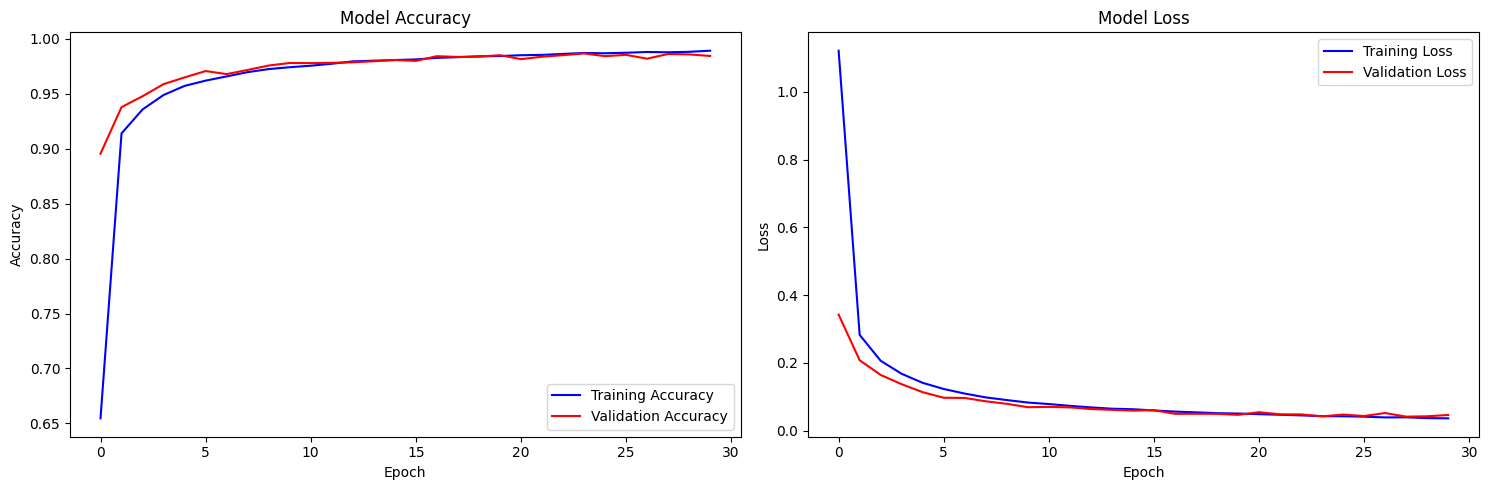

In [58]:
train_model(LeNet_model, X_train, y_train, X_test, y_test)

### 5. Prediction

In [59]:
import numpy as np

In [60]:
# Predict labels for the test set
y_test_pred = np.argmax(LeNet_model.predict(X_test), axis=1)
# Output of LeNet.predict(X_test_norm) is a numpy array with the shape (num_samples, num_classes). Each row corresponds to the predicted probabilities for each class (0-9) for a particular input image.
# To obtain the final predicted class label for each input image, we use np.argmax() to find the index of the class with the highest probability for each input.
type(y_test)

313/313 [==============================] - 2s 6ms/step


numpy.ndarray

Determine the confusion matrix

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Text(70.72222222222221, 0.5, 'True classes')

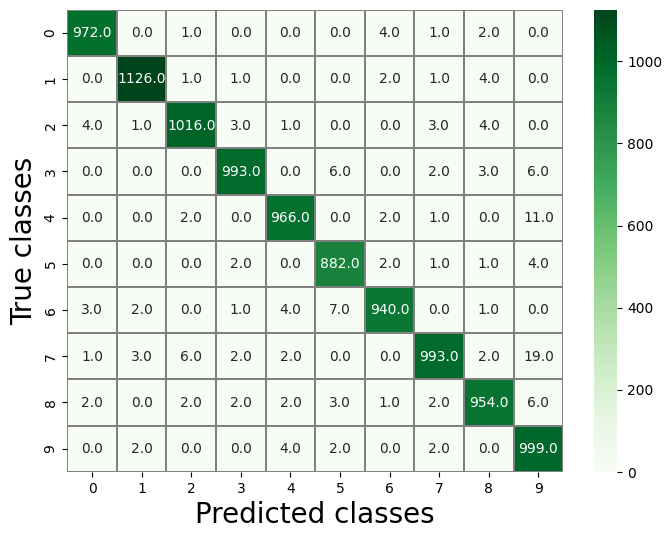

In [62]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

Visualize randomly some images in the test set as well as their predicted labels

In [63]:
# all categories
categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

1/1 [==============================] - 0s 17ms/step


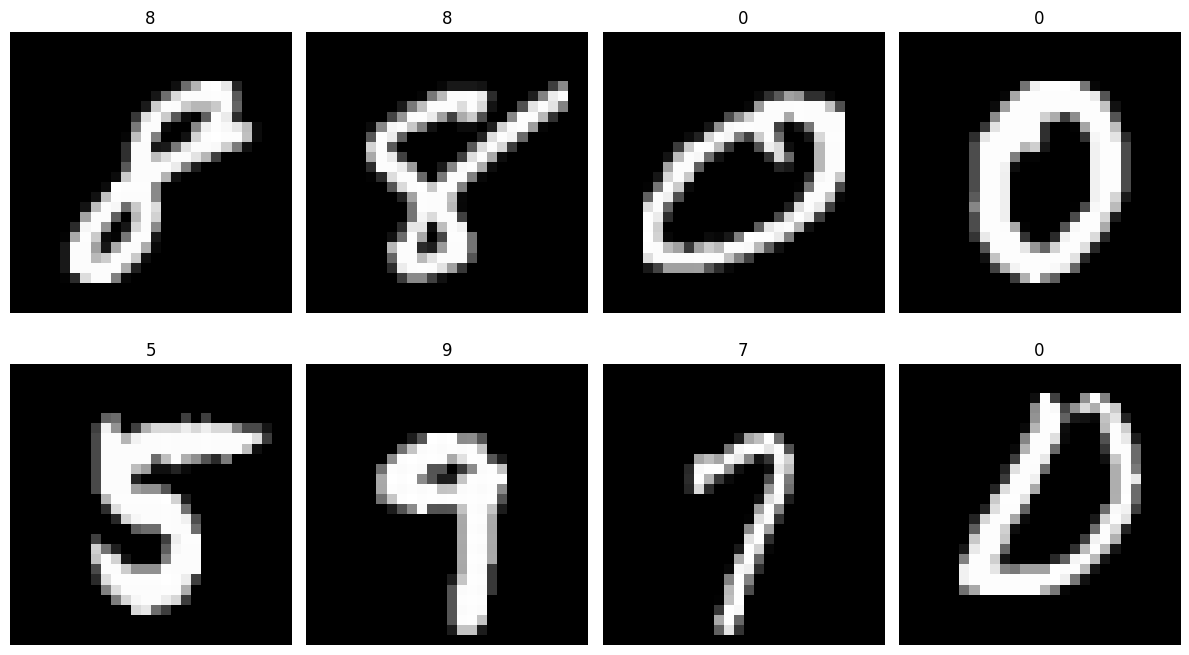

In [68]:
plt.figure(figsize=(12, 7))
num_images = 8
random_indices = np.random.choice(len(X_test), num_images, replace=False)

for i, index in enumerate(random_indices):
    img = X_test[index].reshape(1, 28, 28, 1).astype('float32') / 255.0  # Reshape and normalize the image
    prediction = np.argmax(LeNet_model.predict(img), axis=1)[0]   # Extract predicted class, returns the index of the class with the highest probability predicted by the model.

    plt.subplot(240+1+i) # or plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[index], cmap='gray')
    plt.title(categories[prediction])
    plt.axis('off')

plt.tight_layout()
plt.show()


## IV. Conclusion
Discovered the architecture of the LeNet model and how to implement it in Keras. This model is successfully applied for classifying MNIST handwritten digit images with ~98.7% of performance.